# Exploring Health Records

This notebook explores a dataset generated by a previous project. For context, visit https://github.com/amcgaha/coding-health-records/blob/main/README.md.

1. Import and process dataset
2. Develop plotting functions
3. Explore Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load and Process Data
First, load data and specify which columns to use.

In [2]:
columns = ['patient_id', 'report_year', 'is_camper', 'home_notified', 'abdominal_pain',
       'abrasion', 'allergy', 'anaphylaxis', 'blister', 'bm', 'bruise',
       'bug_bite', 'congestion', 'cut', 'diarrhea', 'fatigue', 'fever',
       'headache', 'hives', 'homesick', 'itch', 'menstrual', 'mono', 'nausea',
       'respiratory', 'sore_throat', 'splinter', 'sting', 'stomach_ache',
       'sun_burn', 'tick', 'rolled_ankle', 'vomiting', 'wound', 'poison_ivy',
       'swelling', 'rash', 'cough', 'asthma', 'fracture', 'burn', 'cold',
       'nosebleed', 'toe', 'bike', 'predator', 'capture', 'hike', 'hit',
       'campout', 'anxiety', 'lice', 'grass', 'eye', 'sleep', 'sum_true',
        'summer_day_id', 'session_id', 'weekday', 'day_type', 'session_day']

full_df = pd.read_csv('C:\\Users\\avery\\OneDrive\\wave_visuals\\health_dataset_full.csv', usecols=columns)

print(full_df.columns)

Index(['patient_id', 'is_camper', 'home_notified', 'abdominal_pain',
       'abrasion', 'allergy', 'anaphylaxis', 'blister', 'bm', 'bruise',
       'bug_bite', 'congestion', 'cut', 'diarrhea', 'fatigue', 'fever',
       'headache', 'hives', 'homesick', 'itch', 'menstrual', 'mono', 'nausea',
       'respiratory', 'sore_throat', 'splinter', 'sting', 'stomach_ache',
       'sun_burn', 'tick', 'rolled_ankle', 'vomiting', 'wound', 'poison_ivy',
       'swelling', 'rash', 'cough', 'asthma', 'fracture', 'burn', 'cold',
       'nosebleed', 'toe', 'bike', 'predator', 'capture', 'hike', 'hit',
       'campout', 'anxiety', 'lice', 'grass', 'eye', 'sleep', 'sum_true',
       'report_year', 'summer_day_id', 'session_id', 'weekday', 'day_type',
       'session_day'],
      dtype='object')


In this and future analyses, we want to easily look at not only single symptoms (for example, fevers or cuts) but also collections of symptoms, like injuries or cold/flu symptoms. 

The first thing we should do in the data processing phase is to create these "buckets" of symptoms by creating a dictionary.

In [4]:
bucket_dict = {'one_cold_flu': ['congestion', 'respiratory', 'headache', 'fever', 'cough', 'cold', 'fatigue'],
               'two_cold_flu': ['congestion', 'respiratory', 'headache', 'fever', 'cough', 'cold', 'fatigue'],
               'gi_issues': ['stomach_ache', 'nausea', 'bm', 'diarrhea', 'abdominal_pain'],
               'injury': ['wound', 'rolled_ankle', 'fracture', 'swelling', 'cut', 'splinter', 'burn', 'bruise', 'abrasion', 'hit'],
               'allergic': ['allergy', 'hives', 'rash', 'itch', 'anaphylaxis', 'grass'],
               'entropy': ['fatigue', 'blister'],
               'mental_health': ['anxiety', 'homesick'],
               'random': ['menstrual', 'nosebleed'],
               'bugs_any': ['bug_bite', 'tick', 'sting', 'lice']
              }

Create a function that generates buckets as new columns from exisiting collections of columns.

In [89]:
def create_bucket(dataframe, dictionary, key, sum_count):
    """Sums all Trues from a collection of columns, located from a dictionary, and creates a new column with the sum count."""
    
    # initialize new column
    dataframe[key] = False
    
    # state list of columns in bucket, from dictionary value
    column_list = dictionary[key]
    
    # sum all trues across selected columns and subset rows that have a specified number of Trues
    condition = dataframe.loc[:, column_list].sum(axis=1) >= sum_count
    
    # set bucket value (new column) to True where meets above condition
    dataframe.loc[condition, key] = True

Apply ```create_bucket``` function to each key in the ```bucket_dict```, setting the count kwarg to 2 for only the ```'two_cold_flu'``` bucket. 

In [6]:
for key in bucket_dict:
    
    if key == 'two_cold_flu':
        count = 2
        create_bucket(full_df, bucket_dict, key, count)
    
    else:
        count = 1
        create_bucket(full_df, bucket_dict, key, count)

Verify that the buckets were created correctly.

In [7]:
print(full_df['two_cold_flu'].sum())
print(full_df['one_cold_flu'].sum())

366
1735


In [8]:
print(full_df.columns)

Index(['patient_id', 'is_camper', 'home_notified', 'abdominal_pain',
       'abrasion', 'allergy', 'anaphylaxis', 'blister', 'bm', 'bruise',
       'bug_bite', 'congestion', 'cut', 'diarrhea', 'fatigue', 'fever',
       'headache', 'hives', 'homesick', 'itch', 'menstrual', 'mono', 'nausea',
       'respiratory', 'sore_throat', 'splinter', 'sting', 'stomach_ache',
       'sun_burn', 'tick', 'rolled_ankle', 'vomiting', 'wound', 'poison_ivy',
       'swelling', 'rash', 'cough', 'asthma', 'fracture', 'burn', 'cold',
       'nosebleed', 'toe', 'bike', 'predator', 'capture', 'hike', 'hit',
       'campout', 'anxiety', 'lice', 'grass', 'eye', 'sleep', 'sum_true',
       'report_year', 'summer_day_id', 'session_id', 'weekday', 'day_type',
       'session_day', 'one_cold_flu', 'two_cold_flu', 'gi_issues', 'injury',
       'allergic', 'entropy', 'mental_health', 'random', 'bugs_any'],
      dtype='object')


Create separate dataframes for camper and staff only records.

In [9]:
camper_df = full_df[full_df['is_camper'] == True]
print(camper_df.shape)

staff_df = full_df[full_df['is_camper'] == False]
print(staff_df.shape)

(3097, 70)
(692, 70)


Store all three in a dictionary to loop over later.

In [10]:
df_dict = {'all': full_df,
           'staff': staff_df, 
           'campers': camper_df}

Define a function that groups dataframe by ```'session_day_id'```, applies ```functions``` to aggregate data, and then fill in missing days.

In [11]:
def prepare_by_day(dataframe, cols_to_group, function_dict):
    """creates a groupby object, turns it into a dataframe, then merges with another dataframe to fill missing day values"""
    
    # create groupby object using specified columns and function dictionary
    grouped = dataframe.groupby(cols_to_group).agg(function_dict)
    
    # turn groupby object into dataframe and fill na values with 0
    grouped_df = pd.DataFrame(grouped).fillna(0).reset_index()
    
    # generate day list, dictionary, then dataframe
    day_list = [day for day in range(1, 75)]
    day_dict = dict.fromkeys(grouped.columns, 0)
    day_df = pd.DataFrame(day_dict, index=day_list)
    day_df['summer_day_id'] = day_df.index
    day_df_selected = day_df[['summer_day_id']]
    
    # merge
    joined_df = grouped_df.merge(day_df_selected, on='summer_day_id', how='outer').fillna(0)
    
    # return output
    return joined_df.sort_values('summer_day_id')


Define a function that groups dataframe by ```'session_id'``` and applies ```functions``` to aggregate data. 

In [12]:
def prepare_by_session(dataframe, function_dict):
    
    grouped = dataframe.groupby(['report_year', 'session_id']).agg(function_dict)
    
    # turn groupby object into dataframe and fill na values with 0
    grouped_df = pd.DataFrame(grouped).fillna(0).reset_index()
    
    return grouped_df

Create the ```functions``` dictionary used in the above functions. 

In [90]:
# create dictionary of functions. In this case, we will want to find the sum of *almost* every column.    
function_string = 'sum'
functions = dict.fromkeys(full_df.columns, function_string)

# We don't want to sum 'patient_id', which is a primary key for a database and not a meaningful number. 
# Instead, we want to 'count' this field. Replace 'sum' with 'count' for 'patient_id'
functions['patient_id'] = 'count'

# create a list of items we don't want to apply functions to
no_func_list = ['summer_day_id', 'report_year', 'session_id', 'weekday', 'day_type', 'session_day']

# delete each item in the group_list from agg function
for item in no_func_list:
    del functions[item]
    
# check output
print(functions)

{'patient_id': 'count', 'is_camper': 'sum', 'home_notified': 'sum', 'abdominal_pain': 'sum', 'abrasion': 'sum', 'allergy': 'sum', 'anaphylaxis': 'sum', 'blister': 'sum', 'bm': 'sum', 'bruise': 'sum', 'bug_bite': 'sum', 'congestion': 'sum', 'cut': 'sum', 'diarrhea': 'sum', 'fatigue': 'sum', 'fever': 'sum', 'headache': 'sum', 'hives': 'sum', 'homesick': 'sum', 'itch': 'sum', 'menstrual': 'sum', 'mono': 'sum', 'nausea': 'sum', 'respiratory': 'sum', 'sore_throat': 'sum', 'splinter': 'sum', 'sting': 'sum', 'stomach_ache': 'sum', 'sun_burn': 'sum', 'tick': 'sum', 'rolled_ankle': 'sum', 'vomiting': 'sum', 'wound': 'sum', 'poison_ivy': 'sum', 'swelling': 'sum', 'rash': 'sum', 'cough': 'sum', 'asthma': 'sum', 'fracture': 'sum', 'burn': 'sum', 'cold': 'sum', 'nosebleed': 'sum', 'toe': 'sum', 'bike': 'sum', 'predator': 'sum', 'capture': 'sum', 'hike': 'sum', 'hit': 'sum', 'campout': 'sum', 'anxiety': 'sum', 'lice': 'sum', 'grass': 'sum', 'eye': 'sum', 'sleep': 'sum', 'sum_true': 'sum', 'one_cold_

Now it's time to use the functions. We'll loop over a dictionary of dataframes to make this efficient.

First, apply the ```prepare_by_day()``` function on each value in the dictionary of dataframes, storing each result as a value in a new dictionary, ```prepared_day_dict```.

In [15]:
# initialize dictionary
prepared_day_dict = {}

# apply prepare_by_day function for each item in the original dictionary of dataframes, called df_dict
for key in df_dict:
    prepared_day_dict[key] = prepare_by_day(df_dict[key], ['summer_day_id'], functions)

# check output keys
print(prepared_day_dict.keys())

dict_keys(['all', 'staff', 'campers'])


Repeat this process using the ```prepare_by_session()``` function, storing results in ```session_dict```. 

In [17]:
# initialize new dataframe
session_dict = {}

# apply prepare_by_session function for each item in the original dictionary of dataframes, called df_dict
for key in df_dict:
    session_dict[key] = prepare_by_session(df_dict[key], functions)

# check output keys
print(session_dict.keys())    

## 2. Define Plotting Functions

Define a function to plot categories by session.

In [181]:
def session_plot(dataframe_str, category_str, agg_func):
    """Plots sum or proportion of all visits by session that match a chosen category"""
    
    # select which dataframe to operate on, either 'all', 'campers', or 'staff'
    selected_df = session_dict[dataframe_str]
    
    # Create a new column to plot. 
    # if agg_func = 'sum', don't transform. 
    if agg_func == 'sum':
        selected_df['temp_cat'] = selected_df[category_str]
    
    # if agg_func = 'percent', divide by total visits that session.
    if agg_func == 'percent':
        selected_df['temp_cat'] = (selected_df[category_str] / (selected_df['patient_id'])) * 100
       
    # Create plot and specify order
    category_order = ['staff_training', 'session_1', 'session_2', 'session_3', 'session_4', 'session_5']
    ax = sns.catplot('session_id', 'temp_cat', data=selected_df, kind='box', order=category_order, palette='Set2', aspect=2)

    # Write title text
    title_text = f'{category_str} from {dataframe_str}'

    # Configure labels
    ax.set(xlabel='Camp Session')
    ax.set(ylabel=f'{agg_func} of all visits')
    ax.set(title=title_text)
    
    plt.show()
    
    # Show descriptive statistics
    print(round(selected_df[['session_id', 'temp_cat']].rename({'temp_cat': f'{category_str}'}, axis=1).groupby('session_id').describe(), 2))

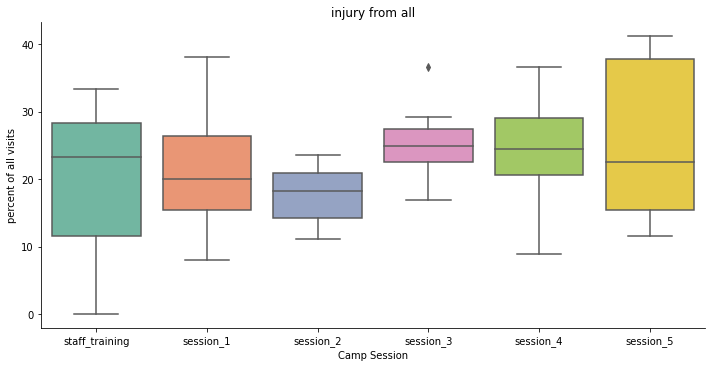

               injury                                                 
                count   mean    std    min    25%    50%    75%    max
session_id                                                            
session_1         7.0  21.40   9.89   8.00  15.48  20.00  26.39  38.10
session_2         7.0  17.60   4.60  11.11  14.28  18.18  20.90  23.53
session_3         7.0  25.45   6.23  16.90  22.55  24.88  27.36  36.56
session_4         7.0  24.20   8.94   8.97  20.63  24.48  29.03  36.60
session_5         7.0  25.98  12.69  11.54  15.48  22.50  37.86  41.18
staff_training    3.0  18.86  17.10   0.00  11.63  23.26  28.29  33.33


In [182]:
session_plot('all', 'injury', 'percent')

Define a function that builds plots by ```'summer_day_id```.

In [152]:
def day_plot(dataframe_str, category_str, agg_func):
    
    """Plots sum or proportion of all visits each day that match a chosen category"""
    
    # select which dataframe to operate on, either 'all', 'campers', or 'staff'
    selected_df = prepared_day_dict[dataframe_str]
    
    # create a new column to plot. 
    # if agg_func = 'sum', don't transform. 
    if agg_func == 'sum':
        selected_df['temp_cat'] = selected_df[category_str]
    
    # if agg_func = 'percent', divide by total visits that session.
    if agg_func == 'percent':
        selected_df['temp_cat'] = (selected_df[category_str] / (selected_df['patient_id'])) * 100
        
    # Create main scatter plot on ax object
    ax = sns.relplot('summer_day_id', 'temp_cat', data=selected_df, kind='scatter', color='lightskyblue', aspect=3)
    
    # Configure and plot rolling average
    selected_df['rolling_avg'] = selected_df['temp_cat'].rolling(7).mean().shift(-3)
    sns.lineplot(x='summer_day_id', y='rolling_avg', data=selected_df)
    
    # Write title text
    title_text = f'{category_str} from {dataframe_str}'

    # Configure labels
    ax.set(xlabel='')
    ax.set(ylabel=f'{agg_func} of all visits')
    ax.set(title=title_text)

    # Draw lines at each session change
    plt.axvline(11, 0, 1, c='gray', alpha=0.5)
    plt.axvline(18, 0, 1, c='gray', alpha=0.5)
    plt.axvline(32, 0, 1, c='gray', alpha=0.5)
    plt.axvline(52, 0, 1, c='gray', alpha=0.5)
    plt.axvline(68, 0, 1, c='gray', alpha=0.5)
    plt.axvline(74, 0, 1, c='gray', alpha=0.5)
    
    # Configure xticks
    plt.xticks(ticks=[5, 14, 25, 42, 60, 71], labels=['Training', 'Session 1', 'Session 2', 'Session 3', 'Session 4', 'Session 5'])
    plt.xlim(0, 74)
    
    # if agg_func is percent, create a flexible ylim, which adjusts if the max y value is less or equal to 50.
    if agg_func == 'percent':
        if selected_df['temp_cat'].max() <= 50:
            plt.ylim(0, 50)
        else:
            plt.ylim(0, 80)
    else:
        pass

    plt.show()
    
    # Show descriptive statistics
    print(round(selected_df[['temp_cat', 'gi_issues', 'injury', 'bugs_any']].rename({'temp_cat': f'{category_str}'}, axis=1).describe(), 2))    

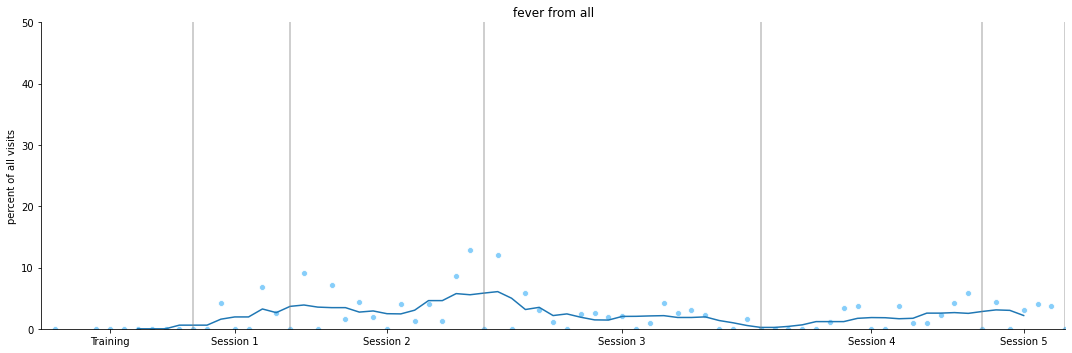

       fever  gi_issues  injury  bugs_any
count  72.00      74.00   74.00     74.00
mean    2.18      10.72   12.03     10.26
std     2.84       9.11   10.73      8.44
min     0.00       0.00    0.00      0.00
25%     0.00       3.00    2.25      3.00
50%     1.23       8.50    9.00      8.00
75%     3.70      16.75   18.75     17.00
max    12.90      36.00   35.00     28.00


In [153]:
day_plot('all', 'fever', 'percent')

Define a similar function that plots both ```'campers'``` and ```'staff'``` on the same plot.

In [173]:
def day_plot_double(category_str, agg_func):
    
    """Plots sum or proportion of all visits each day that match a chosen category, both campers and staff on same plot"""
    
    # select which dataframe to operate on, either 'all', 'campers', or 'staff'
    camper_df = prepared_day_dict['campers']
    staff_df = prepared_day_dict['staff']
    
    # create a new column to plot. 
    # if agg_func = 'sum', don't transform. 
    if agg_func == 'sum':
        camper_df['temp_cat'] = camper_df[category_str]
        staff_df['temp_cat'] = staff_df[category_str]
    
    # if agg_func = 'percent', divide by total visits that session.
    if agg_func == 'percent':
        camper_df['temp_cat'] = (camper_df[category_str] / (camper_df['patient_id'])) * 100
        staff_df['temp_cat'] = (staff_df[category_str] / (staff_df['patient_id'])) * 100
        
    # Create main scatter plot on ax object
    ax = sns.relplot('summer_day_id', 'temp_cat', data=camper_df, kind='scatter', color='lightskyblue', aspect=3)
    
    # Add secondary scatter plot
    sns.scatterplot('summer_day_id', 'temp_cat', data=staff_df, color='lightgreen')
        
    # Configure and plot rolling averages
    camper_df['rolling_avg'] = camper_df['temp_cat'].rolling(7).mean().shift(-3)
    sns.lineplot(x='summer_day_id', y='rolling_avg', data=camper_df, color='blue')
    
    staff_df['rolling_avg'] = staff_df['temp_cat'].rolling(7).mean().shift(-3)
    sns.lineplot(x='summer_day_id', y='rolling_avg', data=staff_df, color='green')
    
    # Write title text
    title_text = f'{category_str}'

    # Configure labels
    ax.set(xlabel='')
    ax.set(ylabel=f'{agg_func} of all visits')
    ax.set(title=title_text)

    # Draw lines at each session change
    plt.axvline(11, 0, 1, c='gray', alpha=0.5)
    plt.axvline(18, 0, 1, c='gray', alpha=0.5)
    plt.axvline(32, 0, 1, c='gray', alpha=0.5)
    plt.axvline(52, 0, 1, c='gray', alpha=0.5)
    plt.axvline(68, 0, 1, c='gray', alpha=0.5)
    plt.axvline(74, 0, 1, c='gray', alpha=0.5)
    
    # Configure xticks
    plt.xticks(ticks=[5, 14, 25, 42, 60, 71], labels=['Training', 'Session 1', 'Session 2', 'Session 3', 'Session 4', 'Session 5'])
    plt.xlim(0, 74)
    
    # if agg_func is percent, create a flexible ylim, which adjusts if the max y value is less or equal to 50.
    if agg_func == 'percent':
        if camper_df['temp_cat'].max() <= 50 and staff_df['temp_cat'].max() <= 50:
            plt.ylim(0, 50)
        else:
            plt.ylim(0, 80)
            
    plt.show()    
    
    # show descriptive statistics
    camper_object = round(camper_df['temp_cat'].rename({'temp_cat': f'camper {category_str}'}, axis=1).describe(), 2)
    staff_object = round(staff_df['temp_cat'].rename({'temp_cat': f'staff {category_str}'}, axis=1).describe(), 2)
    
    description_df = pd.DataFrame()
    description_df['campers'] = camper_object
    description_df['staff'] = staff_object
    description_df['diff'] = description_df['campers'] - description_df['staff']
    
    print(description_df)

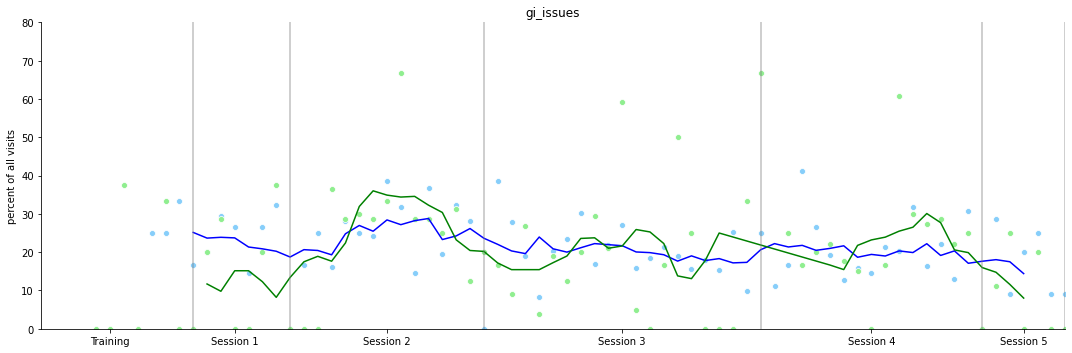

       campers   staff   diff
count    67.00   70.00  -3.00
mean     21.16   20.63   0.53
std       8.95   19.34 -10.39
min       0.00    0.00   0.00
25%      15.85    0.00  15.85
50%      20.29   20.00   0.29
75%      26.85   28.57  -1.72
max      41.18  100.00 -58.82


In [174]:
day_plot_double('gi_issues', 'percent')

Finally, define two functions to quickly generate three plots corresponding to ```'all'```, ```'campers'```, and ```'staff'```.

In [102]:
def plot_all_day(category, agg_func):
    for key in prepared_day_dict:
        day_plot(key, category, agg_func)
        
def plot_all_session(category, agg_func):
    for key in session_dict:
        session_plot(key, category, agg_func)

## 3. Explore Data

Let's first take a look at the data as a whole. The first plot will show all visits by session.

To plot by session, use the ```session_plot()``` function, setting the ```agg_func``` argument to ```'sum'```  and the category to ```'patient_id'```, which will return the sum of ```'all'``` visits each session.

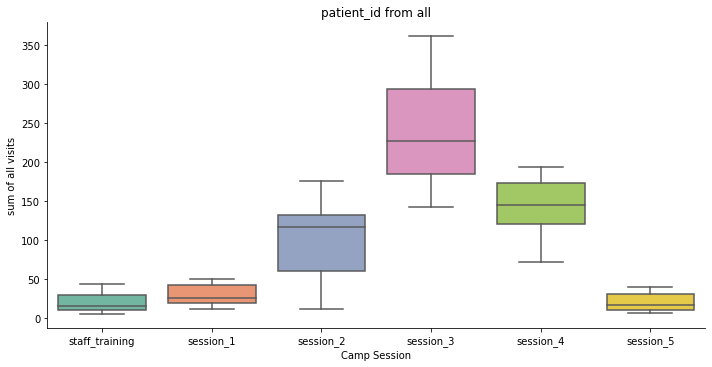

               patient_id                                                  
                    count    mean    std    min    25%    50%    75%    max
session_id                                                                 
session_1             7.0   29.86  15.40   12.0   18.5   25.0   42.5   50.0
session_2             7.0   98.43  58.57   11.0   60.5  117.0  132.0  176.0
session_3             7.0  241.00  78.60  142.0  185.0  227.0  293.5  361.0
session_4             7.0  142.29  43.67   72.0  120.0  145.0  172.5  194.0
session_5             7.0   20.71  13.34    6.0   10.5   17.0   30.5   40.0
staff_training        3.0   21.00  19.70    5.0   10.0   15.0   29.0   43.0


In [184]:
session_plot('all', 'patient_id', 'sum')

### Session Length Matters
One observation is immediately clear: Session 3 has the most visits, followed by a kind of tie between Session 2 and 4. This makes sense because of our camp's summer schedule. __Session 3 is the longest session__, at three weeks, while Sessions 2 and 4 are two-week sessions. Session 1 and 5 are one-week sessions. It makes sense that the shorter sessions have fewer visits to the health center.

Also visible is a difference both the spread of values and mean between Session 2 (98 visits on average) and Session 4 (142). The reason for this difference is unclear. One possibility is a real increase in ailments over time, as conditions evolve throughout the summer. This will need to be explored in finer detail.

Staff training has the lowest visit numbers of all, and that also makes sense. There are only about 65 staff present during this time -- and zero campers. It is also common for no medical staff to be present for the first few days of training, resulting in very few visits recorded.

Let's plot the data for staff in particular. What can we see?

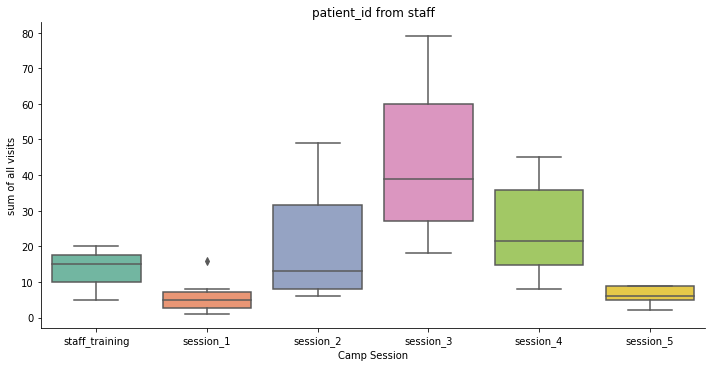

               patient_id                                              
                    count   mean    std   min    25%   50%    75%   max
session_id                                                             
session_1             6.0   6.17   5.42   1.0   2.75   5.0   7.25  16.0
session_2             6.0  20.83  17.78   6.0   8.00  13.0  31.50  49.0
session_3             7.0  44.29  23.13  18.0  27.00  39.0  60.00  79.0
session_4             6.0  24.83  14.63   8.0  14.75  21.5  35.75  45.0
session_5             5.0   6.20   2.95   2.0   5.00   6.0   9.00   9.0
staff_training        3.0  13.33   7.64   5.0  10.00  15.0  17.50  20.0


In [186]:
session_plot('staff', 'patient_id', 'sum')